In [ ]:
sentimental analyses on amazon reviews

In [ ]:
VADER( bag of wirds approach)
Roberta - pretrained model (transformer model)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
df[['Text','Score']].head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [10]:
df['Text'].values

array(['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
       'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
       'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
    

In [11]:
df['Text'].shape

(568454,)

In [34]:
df = df.head(500)

In [ ]:
Quick eda

In [14]:
df['Score']

0      5
1      1
2      4
3      2
4      5
      ..
495    5
496    5
497    4
498    4
499    5
Name: Score, Length: 500, dtype: int64

In [16]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

<Axes: xlabel='Score'>

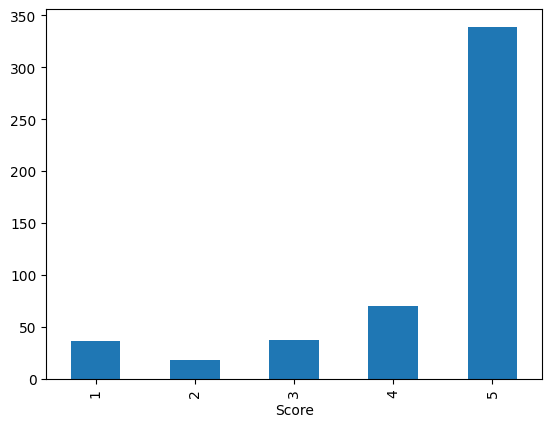

In [18]:
df['Score'].value_counts().sort_index().plot(kind = 'bar')

In [ ]:
very biased of 5 stars

In [21]:
example = df['Text'][50]

In [22]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [23]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [24]:
tokens = nltk.word_tokenize(example)

In [25]:
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [26]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [27]:
tagged = nltk.pos_tag(tokens)

In [28]:
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
next step take these part of speach and chunk them based on name entities 

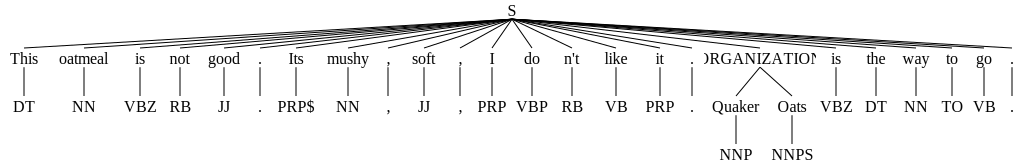

In [30]:
nltk.chunk.ne_chunk(tagged)

In [29]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
VADER (Sentiment scoring)

In [ ]:
SentimentalIntensityAnalyzer to get the neg/neu/pos score of the text

In [ ]:
This uses a "bag of word" approach
each word is stored and combined to give a total score

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores("this is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [29]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# run the polarity score on entire dataset

In [44]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [31]:
from tqdm import tqdm

In [35]:
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    indexid = row['Id']
    res[indexid] = sia.polarity_scores(text)
    

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1559.43it/s]


In [36]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [37]:
vaders = pd.DataFrame(res).T

In [38]:
vaders.reset_index().rename(columns = {'index' : 'id'})

,id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [39]:
new_vader = vaders.reset_index().rename(columns = {'index' : 'id'})

In [40]:
new_vader

,id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [41]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [42]:
# joining in base dataframe
new_vader = new_vader.rename(columns = {'id' : 'Id'})

In [43]:
New_df =new_vader.merge(df, how = 'left')

In [44]:
New_df

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [ ]:
# those who have score 5 must have higher pos value from vader lets check

In [45]:
New_df['pos'][New_df['Score'] == 5]

0      0.305
4      0.448
6      0.273
7      0.480
8      0.149
       ...  
493    0.254
494    0.212
495    0.446
496    0.142
499    0.322
Name: pos, Length: 339, dtype: float64

In [ ]:
plotting the score vs compount score

In [98]:
New_df

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


C:\Users\ashut\AppData\Local\Temp\ipykernel_36160\4111380703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = New_df, x = 'Score', y = 'compound', palette = 'hot')


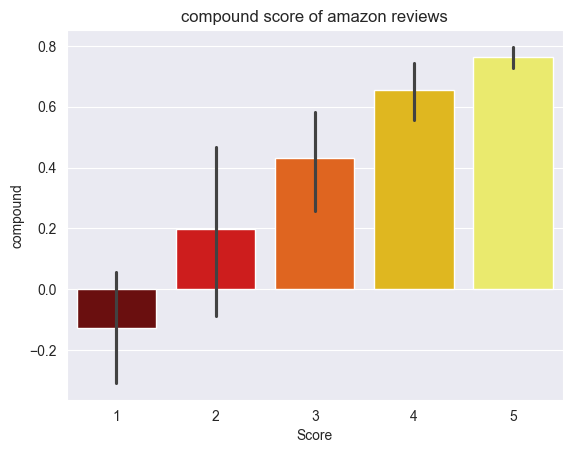

In [67]:
sns.set_style('darkgrid')
ax = sns.barplot(data = New_df, x = 'Score', y = 'compound', palette = 'hot')
ax.set_title("compound score of amazon reviews")
sns.set_style('darkgrid')

In [ ]:
Vager score each word  individually unlike roberta

C:\Users\ashut\AppData\Local\Temp\ipykernel_36160\1167318472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = New_df, x = 'Score', y = 'compound', palette = 'hot', ax = axs[0])
C:\Users\ashut\AppData\Local\Temp\ipykernel_36160\1167318472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = New_df, x = 'Score', y = 'neg',palette = 'hot', ax = axs[1])
C:\Users\ashut\AppData\Local\Temp\ipykernel_36160\1167318472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = New_df, x = 'Score', y = 'pos',palette = 'hot', ax = axs[2]

Text(0.5, 1.0, 'pos score of amazon reviews')

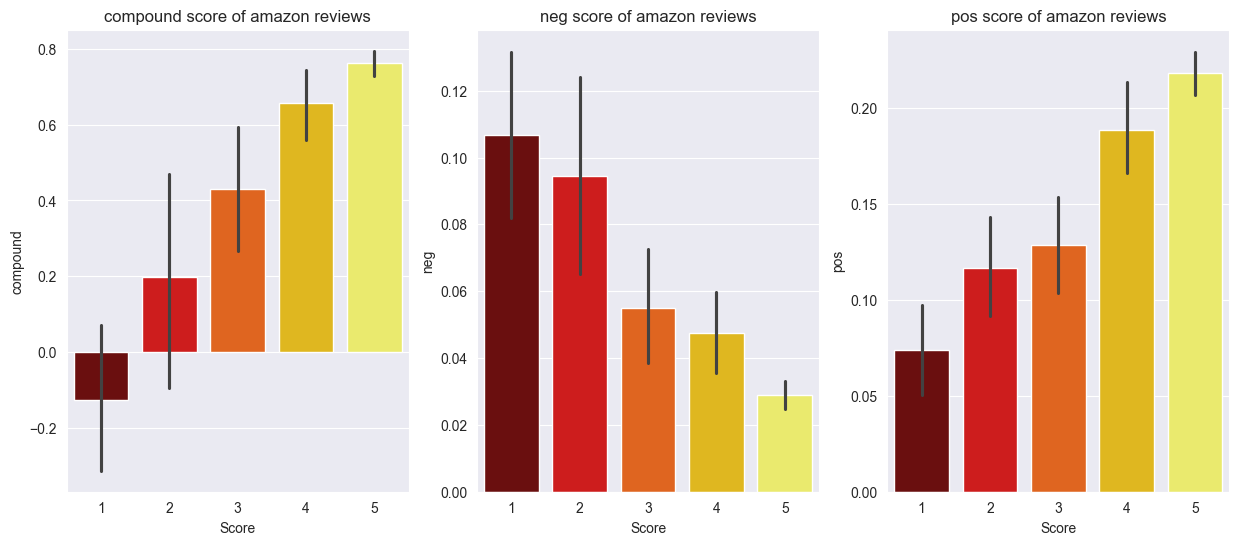

In [73]:
fig, axs = plt.subplots(1,3 , figsize = [15,6])
sns.barplot(data = New_df, x = 'Score', y = 'compound', palette = 'hot', ax = axs[0])
axs[0].set_title("compound score of amazon reviews")
sns.barplot(data = New_df, x = 'Score', y = 'neg',palette = 'hot', ax = axs[1])
axs[1].set_title("neg score of amazon reviews")
sns.barplot(data = New_df, x = 'Score', y = 'pos',palette = 'hot', ax = axs[2])
axs[2].set_title("pos score of amazon reviews")

In [78]:
# from hugging face api
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [79]:
from scipy.special import softmax

In [57]:
import torch

In [58]:
torch.cuda.is_available()

True

In [ ]:
Roberta pretrained model

In [80]:
# hugging face dataset and pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [81]:
# to train it using gpu

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [82]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [5]:
tokenizer

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [75]:
import Pytorch


ModuleNotFoundError: No module named 'Pytorch'

In [85]:
example = 'this oatmeal is not good. its mushy, soft, i dont kike it . quaker oats is the way to go '

In [86]:
# run for Roberta Model
# encoding the text
# 'pt' means pytorch
tokenizer(example, return_tensors = 'pt').to('cuda:0')

{'input_ids': tensor([[    0,  9226,  1021, 38615,    16,    45,   205,     4,    63, 39589,
           219,     6,  3793,     6,   939, 33976,   449,  4348,    24,   479,
          2677,  4218, 38368,    16,     5,   169,     7,   213,  1437,     2]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [87]:
encoded_text = tokenizer(example, return_tensors = 'pt')

In [88]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [89]:
output = model(**encoded_text)

In [90]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.9098, -0.5862, -2.5002]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [91]:
output[0][0]

tensor([ 2.9098, -0.5862, -2.5002], grad_fn=<SelectBackward0>)

In [92]:
output[0][0].detach().numpy()

array([ 2.9097574, -0.5861676, -2.500158 ], dtype=float32)

In [93]:
scores = output[0][0].detach().numpy()
scores

array([ 2.9097574, -0.5861676, -2.500158 ], dtype=float32)

In [94]:
new_score = softmax(scores)

In [95]:
new_score

array([0.96637714, 0.02930122, 0.00432166], dtype=float32)

In [104]:
# to do on entire dataset

scores_dict = {}

# defining the function for readable format

def roberta_scores(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    new_score = softmax(scores)
    scores_dict = {'roberta_neg' : new_score[0], 'roberta_neu' : new_score[1], 'roberta_pos' : new_score[2]}
    return scores_dict

    



In [105]:
roberta_scores('i didnt like the food, its very unhealthy')

{'roberta_neg': 0.9779693,
 'roberta_neu': 0.019756235,
 'roberta_pos': 0.002274405}

In [97]:
score_to_dict('i didnt like the food, its very unhealthy')

NameError: name 'score_to_dict' is not defined

In [106]:
# iterating to entire dataset
res = {}
for i , row in df.iterrows():
    # Vager_score
    text = row['Text']
    indexid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_.(key)"] = value
    
    roberta_res = {}
    # rooberta score
    roberta_res = roberta_scores(text)

    # merging both into single dictionary
    both = {**vader_result_rename, **roberta_res}

    res[indexid] = both
        

RuntimeError: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]

In [ ]:
# this is gonna break because some input text have larger text than roberta cannot unpack
we are going to skip that answers

In [108]:
df[:300]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
295,296,B001UJEN6C,ADWJAJZTHNYN6,D. J. Lawhead,2,2,5,1322697600,Rocket in a Bottle,I've been feeling extremely tired around the l...
296,297,B001UJEN6C,A3UD9G34YLWVXE,Thezwomann,2,2,4,1322265600,This stuff works!!!,The energy shot truly does work! It had a terr...
297,298,B001UJEN6C,A2Y4IWY1ZXLXH8,mase310,1,1,5,1335139200,Favorite energy shot and all natural too!,"I've tried 5-hour energy, red rain, NOS, and o..."
298,299,B001UJEN6C,AHAX3RWULQD6T,Kevin D. Schoeninger,1,1,5,1334793600,natural energy boost,If you're looking for an energy boost without ...


In [107]:
# iterating to entire dataset
res = {}
for i , row in df[:400].iterrows():
    try:
        # Vager_score
        text = row['Text']
        indexid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_.{key}"] = value
        
        roberta_res = {}
        # rooberta score
        roberta_res = roberta_scores(text)
    
        # merging both into single dictionary
        both = {**vader_result_rename, **roberta_res}
    
        res[indexid] = both
    except RuntimeError:
        print(f'Broke for id {indexid}')
        
        

Broke for id 83
Broke for id 187


In [116]:
res

{1: {'vader_.neg': 0.0,
  'vader_.neu': 0.695,
  'vader_.pos': 0.305,
  'vader_.compound': 0.9441,
  'roberta_neg': 0.009624231,
  'roberta_neu': 0.0499804,
  'roberta_pos': 0.94039536},
 2: {'vader_.neg': 0.138,
  'vader_.neu': 0.862,
  'vader_.pos': 0.0,
  'vader_.compound': -0.5664,
  'roberta_neg': 0.5089862,
  'roberta_neu': 0.4524135,
  'roberta_pos': 0.038600326},
 3: {'vader_.neg': 0.091,
  'vader_.neu': 0.754,
  'vader_.pos': 0.155,
  'vader_.compound': 0.8265,
  'roberta_neg': 0.003228897,
  'roberta_neu': 0.09806738,
  'roberta_pos': 0.8987037},
 4: {'vader_.neg': 0.0,
  'vader_.neu': 1.0,
  'vader_.pos': 0.0,
  'vader_.compound': 0.0,
  'roberta_neg': 0.0022951285,
  'roberta_neu': 0.09021923,
  'roberta_pos': 0.90748566},
 5: {'vader_.neg': 0.0,
  'vader_.neu': 0.552,
  'vader_.pos': 0.448,
  'vader_.compound': 0.9468,
  'roberta_neg': 0.0016347283,
  'roberta_neu': 0.0103024645,
  'roberta_pos': 0.98806286},
 6: {'vader_.neg': 0.029,
  'vader_.neu': 0.809,
  'vader_.pos':

In [112]:
testing = sia.polarity_scores('restaurnt has a very long waiting period')

In [117]:
for key,value in testing.items():
    print(key)

neg
neu
pos
compound


In [45]:
import tensorflow as tf

In [109]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index' : 'Id'})
results_df = results_df.merge(df, how ='left')


In [110]:
results_df

,Id,vader_.neg,vader_.neu,vader_.pos,vader_.compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,396,0.000,0.502,0.498,0.9677,0.001319,0.006035,0.992647,B001ELL6O8,A72H1W5S6UFMY,"King of Breakfasts ""King""",1,1,5,1278460800,A Great All Around Mix,I appreciate the fact that I can buy this prod...
394,397,0.000,0.638,0.362,0.9682,0.001363,0.010226,0.988411,B001ELL6O8,A1PTPN5SY7C7SW,Leonard Kocurek,1,1,5,1215648000,Great mix,Arrowhead Mills Buttermilk Pancake mix is my f...
395,398,0.046,0.703,0.251,0.8670,0.003315,0.027501,0.969185,B001ELL6O8,AZ7289G0ILRFF,Stephanie Reid-Simons,1,1,5,1209427200,Perfect mix for egg-allergic!,The pancakes taste great without any recipe ad...
396,399,0.000,0.800,0.200,0.9885,0.002572,0.044038,0.953390,B001ELL6O8,ALSAOZ1V546VT,"A Research It Maven ""Just the facts please""",1,1,5,1200182400,Arrowhead Mills whole grain buttermilk Pancake...,HEY! These are GREAT Waffles and Pancakes! We ...


In [117]:
results_df[['roberta_neg','roberta_neu'	,'roberta_pos']]

,roberta_neg,roberta_neu,roberta_pos
0,0.009624,0.049980,0.940395
1,0.508986,0.452413,0.038600
2,0.003229,0.098067,0.898704
3,0.002295,0.090219,0.907486
4,0.001635,0.010302,0.988063
...,...,...,...
393,0.001319,0.006035,0.992647
394,0.001363,0.010226,0.988411
395,0.003315,0.027501,0.969185
396,0.002572,0.044038,0.953390


In [47]:
len(tf.config.experimental.list_physical_devices('GPU'))

0

In [46]:
tf.test.is_build_with_cuda()

AttributeError: module 'tensorflow._api.v2.test' has no attribute 'is_build_with_cuda'

In [124]:
results_df.head()

,Id,vader_.neg,vader_.neu,vader_.pos,vader_.compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# comparing scores between model

In [130]:
results_df.columns

Index(['Id', 'vader_.neg', 'vader_.neu', 'vader_.pos', 'vader_.compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

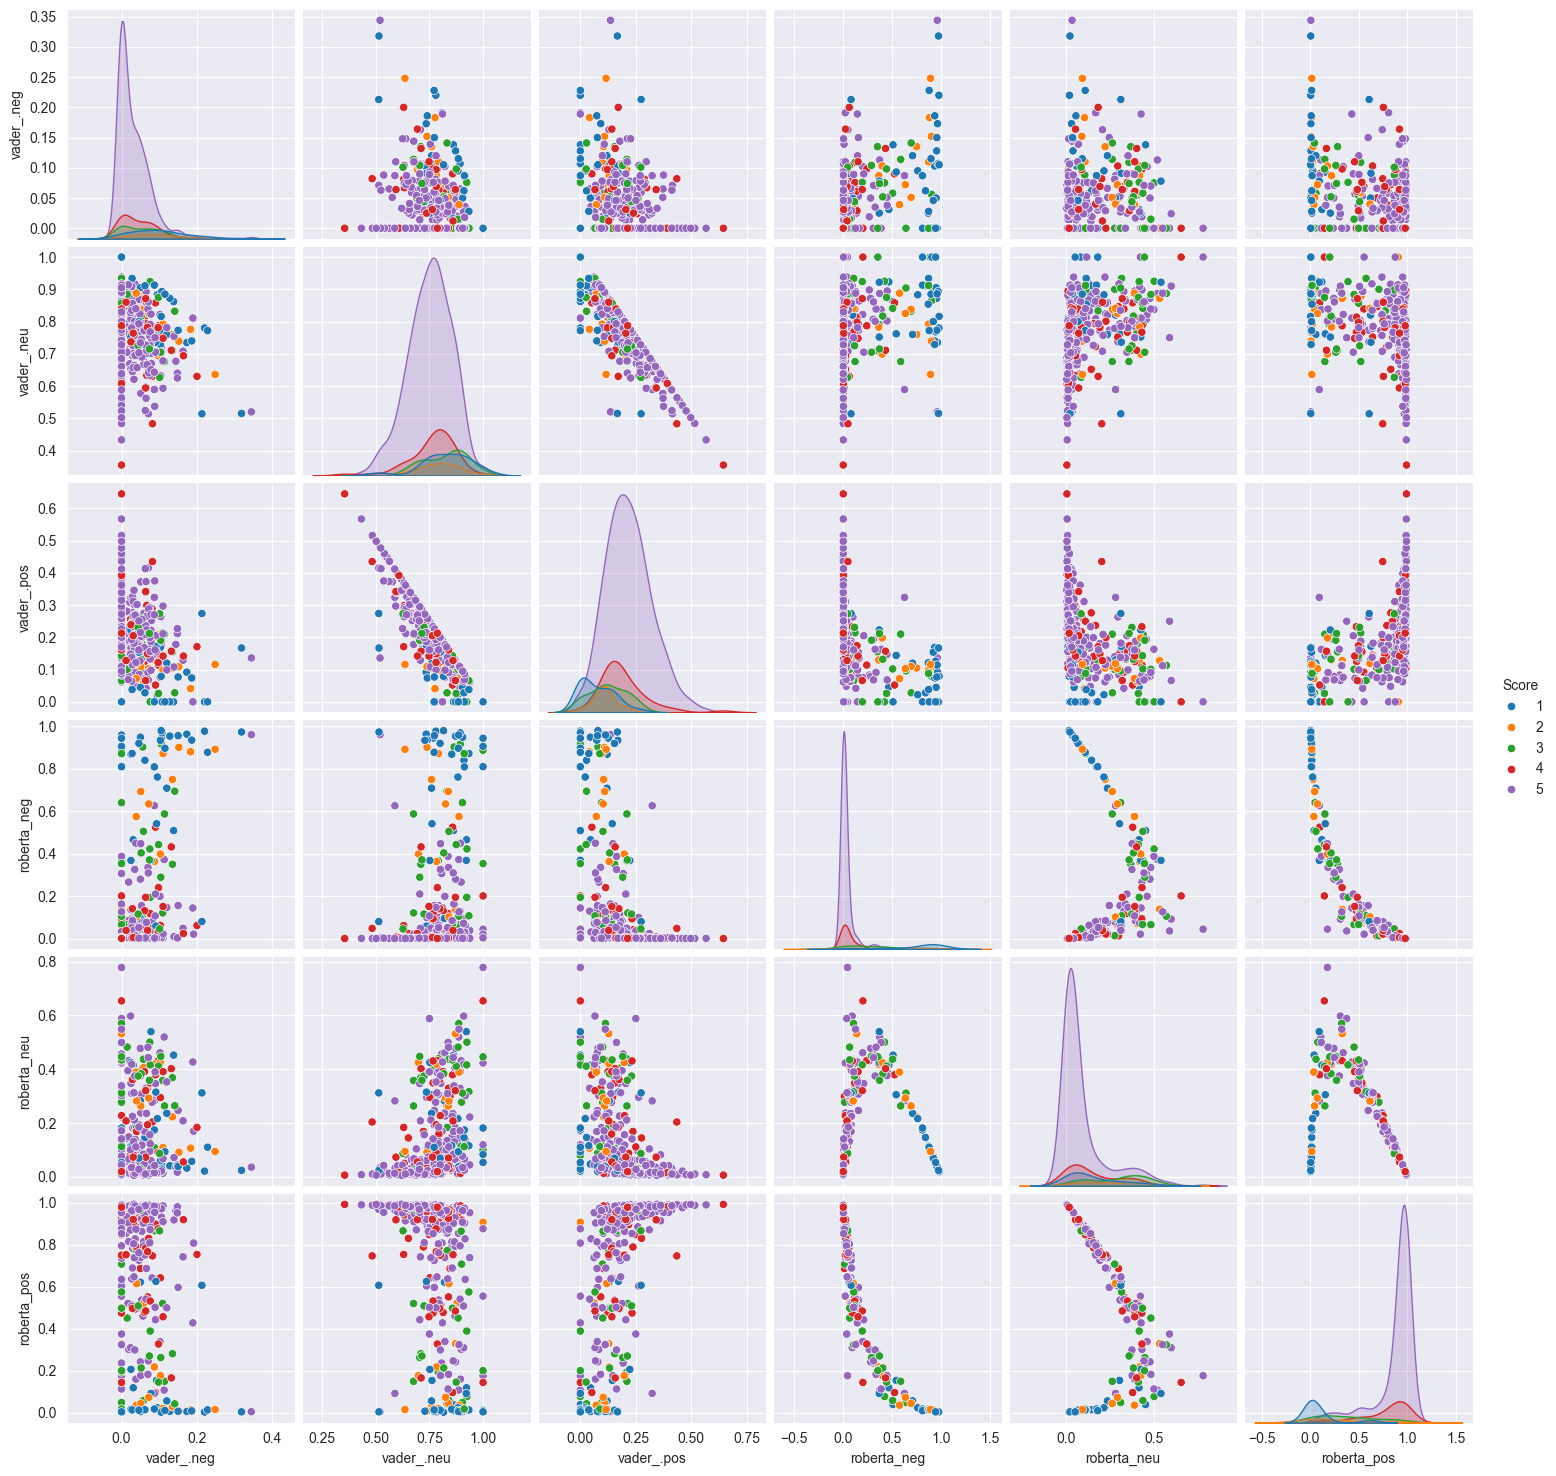

In [121]:
fig1 =sns.pairplot(data = results_df, vars = ['vader_.neg', 'vader_.neu', 'vader_.pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'Score', palette = 'tab10')
fig1
fig1.figure.savefig("output.png")

In [149]:
results_df.query('Score == 5').sort_values('roberta_pos', ascending = True)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [150]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [119]:
results_df.query('Score == 5').sort_values('vader_.pos', ascending = True)['Text'].values[0]

'We had trouble finding this locally - delivery was fast, no more hunting up and down the flour aisle at our local grocery stores.'

In [120]:
results_df.query('Score == 1').sort_values('vader_.pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [152]:
results_df.head(5)

,Id,vader_.neg,vader_.neu,vader_.pos,vader_.compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [155]:
# Vager
results_df.query('Score == 1').sort_values('vader_.pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
The transformer pipeline

In [156]:
from transformers import pipeline

In [161]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [162]:
sent_pipeline(' this is the positive sentiment')

[{'label': 'POSITIVE', 'score': 0.9998631477355957}]